![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [4]:
import tensorflow
tensorflow.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (2 mark)

In [6]:
cd /content/drive/My Drive/Colab Notebooks/ACV_Assignments/ProjectAssignment/

/content/drive/My Drive/Colab Notebooks/ACV_Assignments/ProjectAssignment


In [7]:
ls

 Advance_Computer_Vision_with_CNN_R_Project2_FaceRecognition.ipynb
'Aligned Face Dataset.zip'
'Aligned Face Dataset.zip (Unzipped Files)'/
'Description-ACV- Face Recognition.pdf'
 Practice_ACV_FaceRecognition_Solution.ipynb
 Sarita_Notebook_ACV.ipynb
 vgg_face_weights.h5


### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [8]:
#### Add your code here ####
unzipped = True
if (not unzipped):
  !unzip 'Aligned Face Dataset.zip'
else:
  print('Unzipped already..')  

Unzipped already..


In [9]:
!ls

 Advance_Computer_Vision_with_CNN_R_Project2_FaceRecognition.ipynb
'Aligned Face Dataset.zip'
'Aligned Face Dataset.zip (Unzipped Files)'
'Description-ACV- Face Recognition.pdf'
 Practice_ACV_FaceRecognition_Solution.ipynb
 Sarita_Notebook_ACV.ipynb
 vgg_face_weights.h5


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [11]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [12]:
metadata.shape

(10770,)

In [13]:
metadata[1000]

PINS/pins_Caity Lotz/Caity Lotz28.jpg

In [14]:
type(metadata[1000]), metadata[1000].image_path()

(__main__.IdentityMetadata, 'PINS/pins_Caity Lotz/Caity Lotz28.jpg')

### Define function to load image
- Define a function to load image from the metadata

In [15]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

In [18]:
#### Add your code here ####
load_image('PINS/pins_Caity Lotz/Caity Lotz28.jpg')

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [21]:
!ls


 Advance_Computer_Vision_with_CNN_R_Project2_FaceRecognition.ipynb
'Aligned Face Dataset.zip'
'Aligned Face Dataset.zip (Unzipped Files)'
'Description-ACV- Face Recognition.pdf'
 pins
 PINS
 Practice_ACV_FaceRecognition_Solution.ipynb
 Sarita_Notebook_ACV.ipynb
 vgg_face_weights.h5


In [22]:
!pwd


/content/drive/My Drive/Colab Notebooks/ACV_Assignments/ProjectAssignment


#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [24]:
#model = #### Add your code here ####
#### Add your code here ####
#### Add your code here ####
model = vgg_face()
#### Add your code here ####
model.load_weights('vgg_face_weights.h5')

In [25]:
model.layers[0], model.layers[-2]

(<tensorflow.python.keras.layers.convolutional.ZeroPadding2D at 0x7f58009690b8>,
 <tensorflow.python.keras.layers.core.Flatten at 0x7f57f0080f60>)

### Get vgg_face_descriptor

In [26]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [27]:
type(vgg_face_descriptor)

tensorflow.python.keras.engine.functional.Functional

In [28]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<tf.Tensor 'zero_padding2d_input:0' shape=(None, 224, 224, 3) dtype=float32>],
 [<tf.Tensor 'flatten/Reshape:0' shape=(None, 2622) dtype=float32>])

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [29]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [30]:
embedding_vector[0], type(embedding_vector), type(embedding_vector[0])

(0.031703066, numpy.ndarray, numpy.float32)

In [31]:
embedding_vector[2],embedding_vector[98],embedding_vector[-2]

(-0.012434022, -0.008693813, 0.002190807)

### Generate embeddings for all images (10 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [32]:
total_images = len(metadata)
total_images

10770

In [33]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

In [34]:
embeddings.shape

(10770, 2622)

In [35]:
embeddings[0], embeddings[988], embeddings[988].shape

(array([ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
         0.00219081, -0.00908097]),
 array([-0.00044259,  0.01826   ,  0.01218895, ..., -0.03309939,
         0.0113669 ,  0.02154321]),
 (2622,))

In [36]:
embeddings[8888]

array([ 0.01224729,  0.00078293, -0.00248372, ..., -0.02174847,
        0.00345608,  0.00927403])

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [37]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

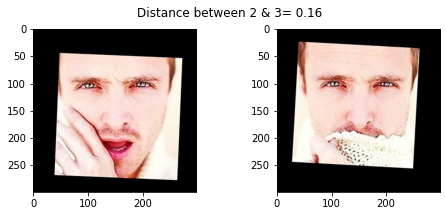

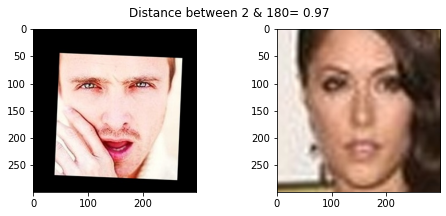

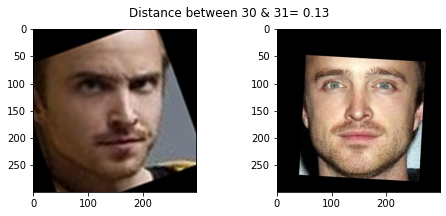

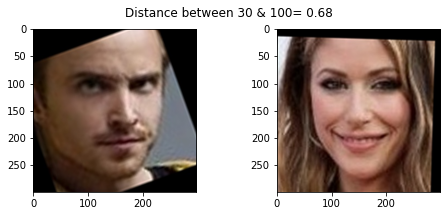

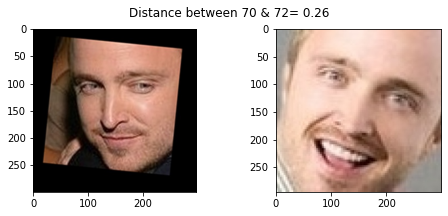

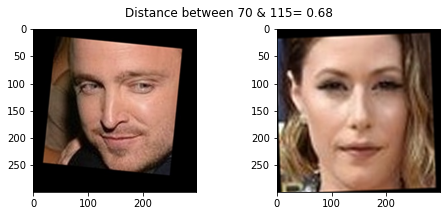

In [38]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

show_pair(30, 31)
show_pair(30, 100)

show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (10 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [39]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities

#### Add your code here ####
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
#### Add your code here ####
y_test = targets[test_idx]

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9573, 2622), (1197, 2622), (9573,), (1197,))

In [41]:
y_test[0], y_train[988]

('pins_Aaron Paul', 'pins_Cameron Monaghan')

In [42]:
len(np.unique(y_test)), len(np.unique(y_train))

(100, 100)

### Encode the Labels (6 marks)
- Encode the targets
- Use LabelEncoder

In [43]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [44]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amanda Crew'
 'pins_Amaury Nolasco' 'pins_Anna Gunn' 'pins_Benedict Cumberbatch'
 'pins_Betsy Brandt' 'pins_Brenton Thwaites' 'pins_Brit Marling'
 'pins_Bryan Cranston' 'pins_Caity Lotz' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Evans' 'pins_Chris Pratt'
 'pins_Cobie Smulders' 'pins_Danielle Panabaker' 'pins_Dave Franco'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Emilia Clarke'
 'pins_Emily Bett Rickards' 'pins_Emma Stone' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Jason Momoa' 'pins_Jeremy Renner'
 'pins_Jesse Eisenberg' 'pins_Jim Parsons' 'pins_Jon Bernthal'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Maisie Williams' 'pins_Mark Ruffalo'
 'pins_Martin Starr' 'pins_Melissa benoit' 'pins_Mike Colter'
 'pins_Morena Baccarin' 'pins_Morgan Freeman' 'pins_Natalie Portman '
 'pins_Neil Patrick Harris' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_

In [45]:
y_test_encoded, y_train_encoded

(array([ 0,  0,  0, ..., 99, 99, 99]), array([ 0,  0,  0, ..., 99, 99, 99]))

### Standardize the feature values (6 marks)
- Scale the features using StandardScaler

In [46]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [47]:
X_test_std = scaler.transform(X_test)

### Reduce dimensions using PCA (6 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [48]:
X_train_std.shape,X_test_std.shape, y_train_encoded.shape, y_test_encoded.shape

((9573, 2622), (1197, 2622), (9573,), (1197,))

In [49]:
from sklearn.decomposition import PCA

#### Add your code here ####
pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### Build a Classifier (6 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [50]:
from sklearn.svm import SVC

#### Add your code here ####
clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train_encoded)

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
y_predict = clf.predict(X_test_pca)

In [52]:
y_predict, y_test_encoded

(array([ 0,  0,  0, ..., 99, 99, 99]), array([ 0,  0,  0, ..., 99, 99, 99]))

In [53]:
y_predict_encoded = le.inverse_transform(y_predict)

In [54]:
y_predict_encoded

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
       'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29')

In [59]:
y_predict.shape

(1197,)

In [60]:
y_test_encoded.shape

(1197,)

In [61]:
y_test_encoded[32:49]

array([1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4])

In [62]:
import numpy as np
import h5py
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [63]:
#clf.score(y_test_encoded_reshaped,y_predict_reshaped)
accuracy_score(y_test_encoded,y_predict)

0.948203842940685

Accuracy is 94.8%

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

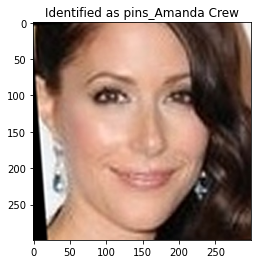

In [64]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] #### Add your code here ####
example_identity =  y_predict_encoded[example_idx] #le.inverse_transform(example_prediction) [0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

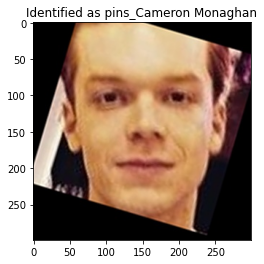

In [65]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 123

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] #### Add your code here ####
example_identity =  y_predict_encoded[example_idx] #le.inverse_transform(example_prediction) [0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

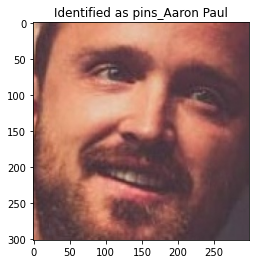

In [66]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 0

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] #### Add your code here ####
example_identity =  y_predict_encoded[example_idx] #le.inverse_transform(example_prediction) [0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

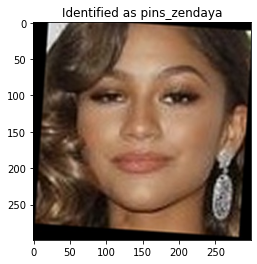

In [67]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = -1

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx] #### Add your code here ####
example_identity =  y_predict_encoded[example_idx] #le.inverse_transform(example_prediction) [0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');